<a href="https://colab.research.google.com/github/jahelsantiago/waifu-net/blob/main/waifu_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data exploration

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Model

In [ ]:
main_path = r"/content/drive/MyDrive/Colab Notebooks/waifu-net/waifus_images"
paths = os.listdir(main_path)
dict_clases = {}
for path in paths:
  dict_clases[path] = [len(os.listdir(os.path.join(main_path, path)))]


df_classes = pd.DataFrame(dict_clases)  
df_classes.head()

,himedere,Deredere,Yangire,Dandere,Yandere,Tsundere,Kundere
0,2167,564,1147,1814,3112,3564,2707


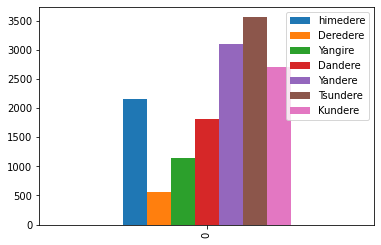

In [ ]:
df_classes.plot.bar()

Creation of the generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40, #rota 40 grados de forma aleatoria las imagenes
    width_shift_range=0.2, #amplia las imagenes 20% a los lados
    height_shift_range=0.2, #apmplia las imagenes 20% hacia arriba
    horizontal_flip = True, #si voltea las imagenes
    vertical_flip = True, #si voltea las imagenes
)

train = data_gen.flow_from_directory(directory=main_path,target_size=(300,300),class_mode="categorical")


Found 15074 images belonging to 7 classes.


Model configuration

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D


base_model = DenseNet121(weights='imagenet',include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(paths), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss="categorical_crossentropy")#get_weighted_loss(pos_weights, neg_weights

callbacks

In [6]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau, ModelCheckpoint


my_callbacks = [
  EarlyStopping(monitor="loss",patience=3,restore_best_weights=True),
  ReduceLROnPlateau(monitor="loss",factor=0.1,patience=3)  
]


history = model.fit(train, epochs=2, callbacks = my_callbacks)